In [34]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [16]:
data = pd.read_csv('D:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\ecoli\ecoli.csv')
data

,mcg,gvh,lip,chg,aac,alm1,alm2,label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [29]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [57]:
data['label'].value_counts()

label
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

## VISUALISASI DATA 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


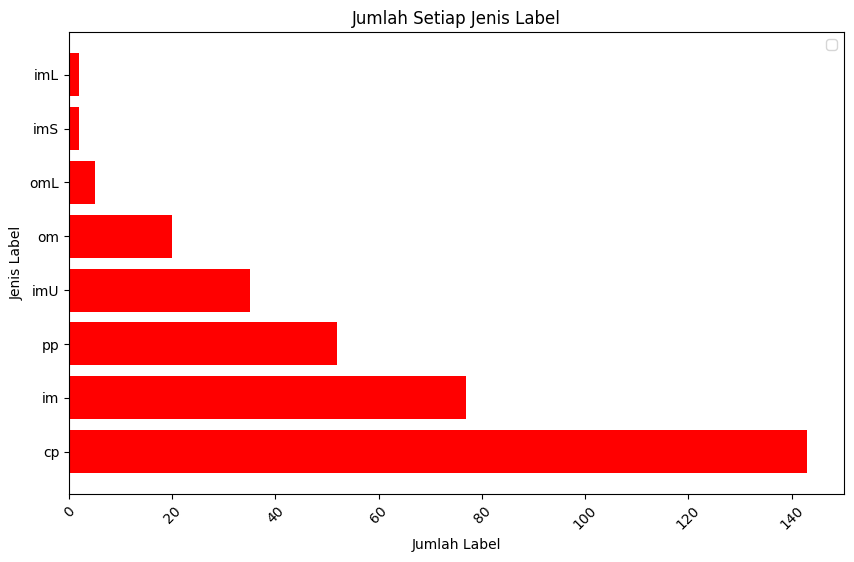

In [53]:
# Hitung jumlah setiap jenis label
label_counts = data['label'].value_counts()

# Buat plot batang
plt.figure(figsize=(10, 6))
plt.barh(label_counts.index, label_counts.values, color='r')
plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## PROSES PEMODELAN

In [59]:
from sklearn.model_selection import train_test_split

In [31]:
x = data.iloc[:,0:7]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42 )

Mencari Tahu Apakah Data Testing Tidak Seimbang Komposisinya

In [46]:
y_train.value_counts()

label
cp     111
im      64
pp      41
imU     31
om      14
omL      4
imL      2
imS      1
Name: count, dtype: int64

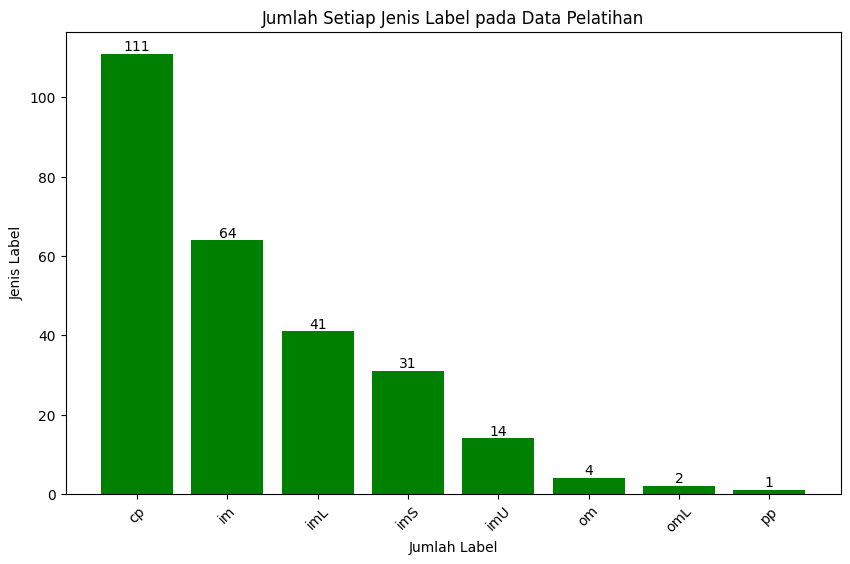

In [50]:
# Hitung jumlah setiap jenis label
label_count = y_train.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train),label_count.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihan')
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil splitting data diatas, bisa dilihat pada barplot diatas bisa disimpulkan bahwasannya data training sudah bisa dikatakan not balance (tidak seimbang) karena komposisi setiap label data yang diambil menjadi data training jumlahnya tidak sama banyak. Hal ini bisa disebabkan karena jumlah data awal sebenarnya tidak banyak jumlahnya ataupun bisa disebabkan oleh random_state(samplingnya).

Disini terdapat dua kemungkinan yang bisa dilakukan, mungkin bisa dicoba terlebih dahulu tanpa menggunakan teknik mengatasi oversampling ataupun undersampling. Jika akurasi dan matrix akurasinya dikira sudah paling tinggi maka teknik mengatasi data tidak seimbang sekiranya tidak perlu dilakukan. Namun jika setelah dilakukan percobaan tanpa oversampling atau undersampling ternyata tidak menghasilkan akurasi dan matrix akurasi yang tidak memuaskan maka bisa dilakukan oversampling maupun undersampling

In [68]:
data['label'].value_counts()

label
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

In [69]:
y_train.value_counts()

label
cp     111
im      64
pp      41
imU     31
om      14
omL      4
imL      2
imS      1
Name: count, dtype: int64

In [67]:
y_test.value_counts()

label
cp     32
im     13
pp     11
om      6
imU     4
omL     1
imS     1
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

## Pemodelan Tanpa Menghandle Imbalance Data

In [63]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Akurasi Pelatihan: 0.8134328358208955
Akurasi Testing :0.7205882352941176 
              precision    recall  f1-score   support

          cp       0.91      0.94      0.92        32
          im       0.59      0.77      0.67        13
         imS       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00         4
          om       0.00      0.00      0.00         6
         omL       1.00      1.00      1.00         1
          pp       0.50      0.73      0.59        11

    accuracy                           0.72        68
   macro avg       0.43      0.49      0.45        68
weighted avg       0.64      0.72      0.67        68



d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

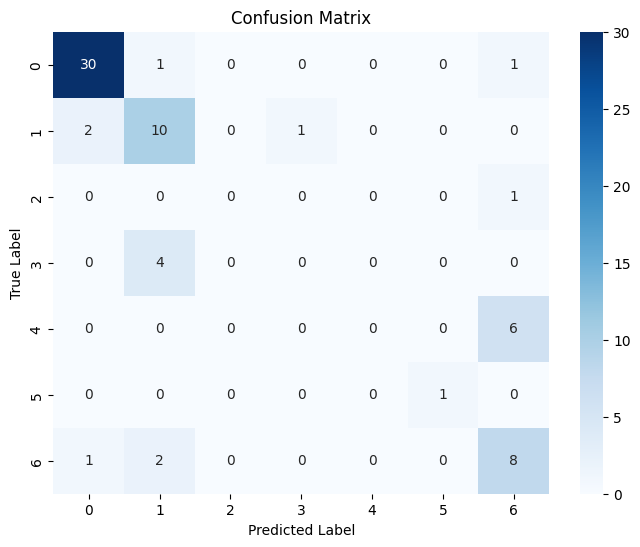

In [74]:
# Model yang digunakan 
GNB = GaussianNB()

# Pemodelan 
GNB.fit(x_train,y_train)

# Pred Training
y_pred_tra_gnb = GNB.predict(x_train)
# Pred Testing 
y_pred_gauss = GNB.predict(x_test)


# Evaluation
# Hitung akurasi pelatihan
accuracy_train = accuracy_score(y_train, y_pred_tra_gnb)
print("Akurasi Pelatihan:", accuracy_train)

print(f"Akurasi Testing :{accuracy_score(y_test,y_pred_gauss)} ")
print (classification_report(y_test, y_pred_gauss))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_pred_gauss)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Akurasi Pelatihan: 1.0
Akurasi Testing :0.7941176470588235 
              precision    recall  f1-score   support

          cp       0.91      0.97      0.94        32
          im       0.80      0.62      0.70        13
         imL       0.00      0.00      0.00         0
         imS       0.00      0.00      0.00         1
         imU       0.25      0.50      0.33         4
          om       1.00      0.67      0.80         6
         omL       0.50      1.00      0.67         1
          pp       0.89      0.73      0.80        11

    accuracy                           0.79        68
   macro avg       0.54      0.56      0.53        68
weighted avg       0.84      0.79      0.80        68



d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

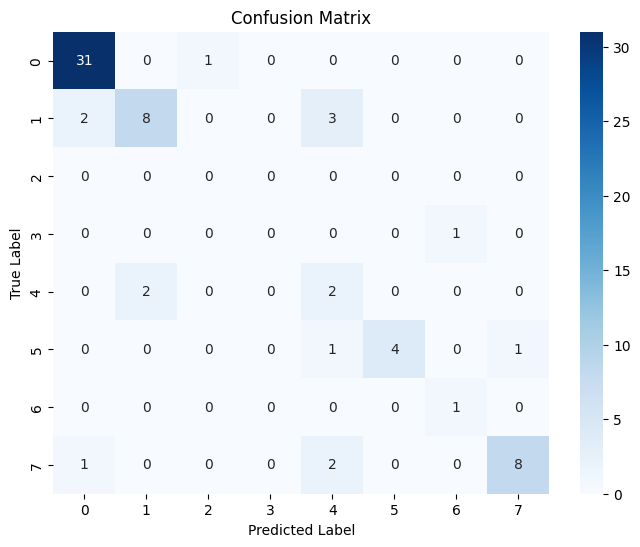

In [75]:
# Model yang akan digunkan
decision = DecisionTreeClassifier()

# Training Model
decision.fit(x_train,y_train)

# Prediksi training 
y_pred_tra_dt = decision.predict(x_train)

# Memprediksi Testing
y_pred = decision.predict(x_test)

# Evaluation
# Hitung akurasi pelatihan
accuracy_train = accuracy_score(y_train, y_pred_tra_dt)
print("Akurasi Pelatihan:", accuracy_train)

print(f"Akurasi Testing :{accuracy_score(y_test,y_pred)} ")
print (classification_report(y_test, y_pred))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Akurasi Pelatihan: 0.7985074626865671
Akurasi Testing :0.7794117647058824 
              precision    recall  f1-score   support

          cp       0.91      0.97      0.94        32
          im       0.69      0.85      0.76        13
         imS       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00         4
          om       0.67      0.33      0.44         6
         omL       0.00      0.00      0.00         1
          pp       0.60      0.82      0.69        11

    accuracy                           0.78        68
   macro avg       0.41      0.42      0.40        68
weighted avg       0.72      0.78      0.74        68



d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

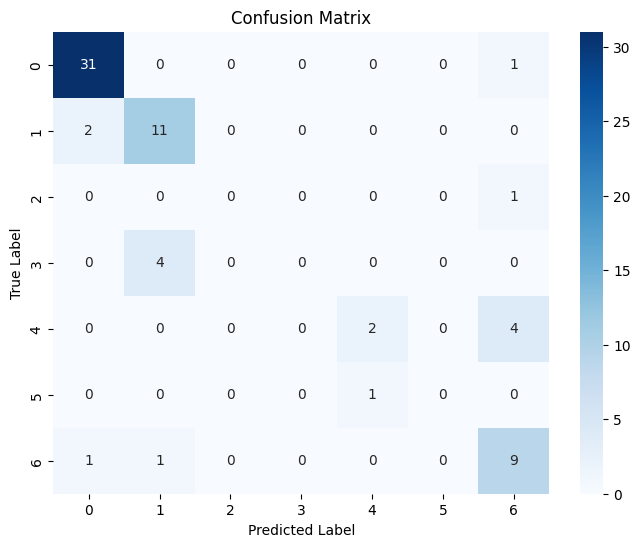

In [76]:
# Model yang digunakan 
svc = SVC(kernel='linear',probability=True)

# Pemodelan 
svc.fit(x_train,y_train)

# Predict
# Training 
y_pred_tra_svc = svc.predict(x_train) 
# Testing
y_predict_svc = svc.predict(x_test)

# Evaluation 
# Hitung akurasi pelatihan
accuracy_train = accuracy_score(y_train, y_pred_tra_svc)
print("Akurasi Pelatihan:", accuracy_train)

print(f"Akurasi Testing :{accuracy_score(y_test,y_predict_svc)} ")
print (classification_report(y_test, y_predict_svc))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_predict_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Akurasi Pelatihan: 0.9029850746268657
Akurasi Testing :0.8823529411764706 
              precision    recall  f1-score   support

          cp       0.91      1.00      0.96        32
          im       0.83      0.77      0.80        13
         imL       0.00      0.00      0.00         0
         imS       0.00      0.00      0.00         1
         imU       1.00      0.75      0.86         4
          om       1.00      0.83      0.91         6
         omL       1.00      1.00      1.00         1
          pp       0.82      0.82      0.82        11

    accuracy                           0.88        68
   macro avg       0.70      0.65      0.67        68
weighted avg       0.88      0.88      0.88        68



d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

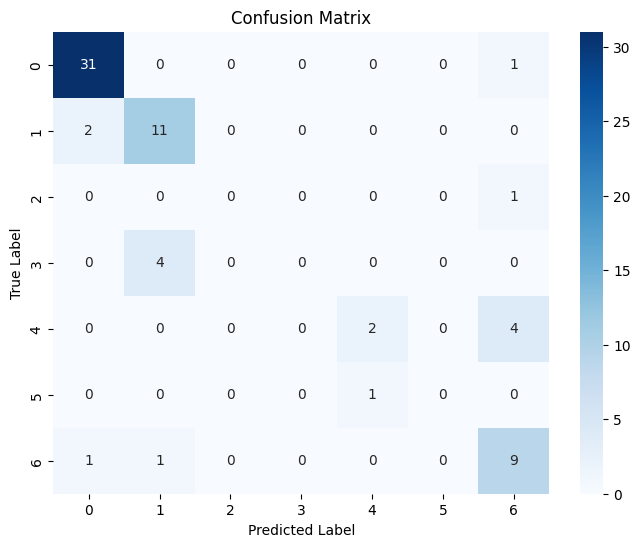

In [78]:
# Model yang digunakan 
knn = KNeighborsClassifier(n_neighbors=5)

# pemodelan 
knn.fit(x_train,y_train)

# Predict
# Train 
y_pred_train_knn = knn.predict(x_train)
# Test
y_pred_knn = knn.predict(x_test)

# Evaluasi
# Hitung akurasi pelatihan
accuracy_train = accuracy_score(y_train, y_pred_train_knn)
print("Akurasi Pelatihan:", accuracy_train)

print(f"Akurasi Testing :{accuracy_score(y_test,y_pred_knn)} ")
print (classification_report(y_test, y_pred_knn))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_predict_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Akurasi Pelatihan: 1.0
Akurasi Prediksi :0.8529411764705882 
              precision    recall  f1-score   support

          cp       0.91      0.97      0.94        32
          im       0.75      0.69      0.72        13
         imS       0.00      0.00      0.00         1
         imU       0.60      0.75      0.67         4
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       0.80      0.73      0.76        11

    accuracy                           0.85        68
   macro avg       0.72      0.73      0.73        68
weighted avg       0.84      0.85      0.85        68



d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

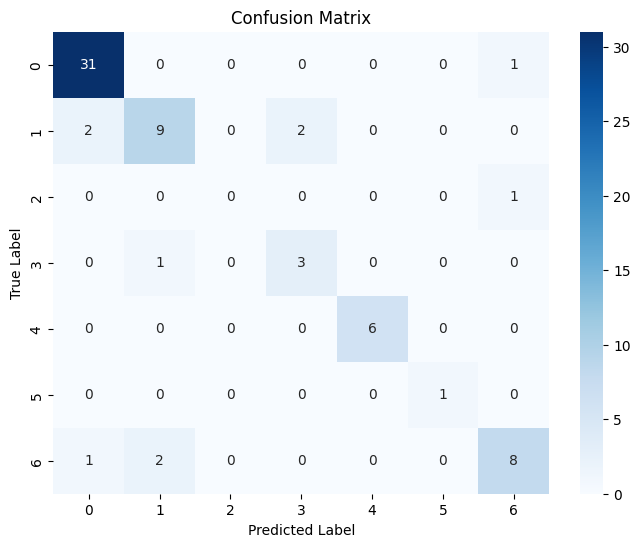

In [80]:
# Model yang digunakan 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Pemodelan 
rf.fit(x_train,y_train)

# Predict
# Training 
y_pred_tra_rf = rf.predict(x_train)
# Testing 
y_pred_rf = rf.predict(x_test)

# Model Evaluation 
# Hitung akurasi pelatihan
accuracy_train = accuracy_score(y_train, y_pred_tra_rf)
print("Akurasi Pelatihan:", accuracy_train)

print(f"Akurasi Prediksi :{accuracy_score(y_test,y_pred_rf)} ")
print (classification_report(y_test, y_pred_rf))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi Hasil Akurasi Setiap Model Tanpa 

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_17412\3378629981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies.keys(), y=accuracies.values(), palette='tab20')# Gunakan 'viridis' colormap


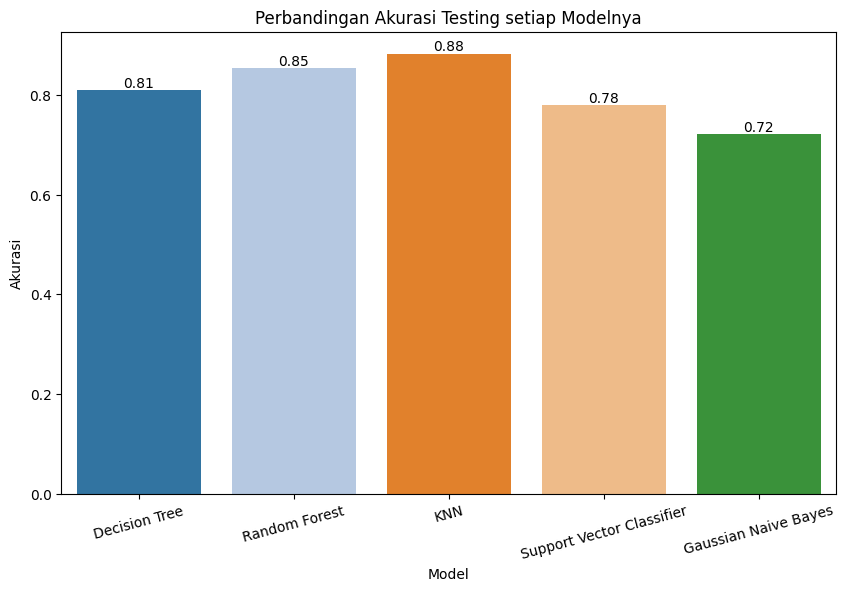

In [178]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies.keys(), y=accuracies.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

In [162]:
# Data contoh
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
akurasi_test = {}
akurasi_train = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    y_pred = model.predict(x_test)
    akurasi = accuracy_score(y_train, y_pred_t)
    accuracy = accuracy_score(y_test, y_pred)
    akurasi_test[name] = accuracy
    akurasi_train[name] = akurasi

# Data contoh
models = list(models.keys())
train_accuracy = list(akurasi_train.values())
test_accuracy = list(akurasi_test.values())

# Membuat dataframe dari data
data = pd.DataFrame({'Model': models * 2, 'Accuracy': train_accuracy + test_accuracy,
                     'Dataset': ['Training'] * len(models) + ['Testing'] * len(models)})

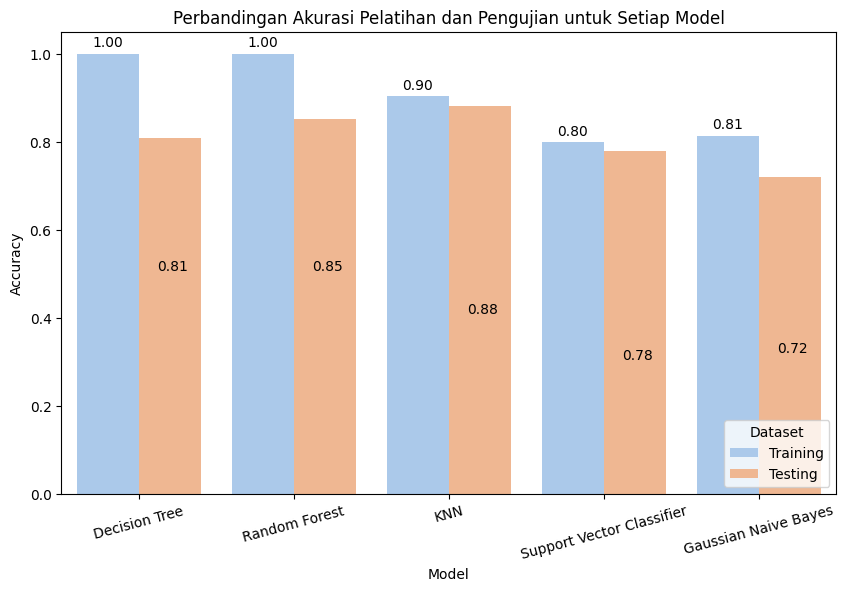

In [175]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=data, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian untuk Setiap Model')
plt.xticks(rotation=15)
plt.legend(title='Dataset', loc='lower right')
# Menambahkan teks di atas setiap bar dengan sedikit offset vertikal
for bar, accuracy_train, accuracy_test in zip(bars.patches[:len(models)], train_accuracy, test_accuracy):
    height = max(accuracy_train, accuracy_test)
    plt.text(bar.get_x() + bar.get_width() - 0.6, height + 0.01, f'{accuracy_train:.2f}', 
             ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() - 0.18, height - 0.5, f'{accuracy_test:.2f}', 
             ha='center', va='bottom')
plt.show()

# Mencoba Performa Model yang Sudah terbentuk Menggunakan Cross Validation apakah model sudah stabil dalam mengenali data data yang dimilikinya

In [179]:
from sklearn.model_selection import cross_val_score

In [182]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(kernel='linear', probability=True),
    'Gaussian Naive Bayes': GaussianNB()
}

# Perform cross-validation
cv_results = {}
num_folds = 5
for name, model in models.items():
    cv_scores = cross_val_score(model, x_, y, cv=num_folds)
    cv_results[name] = cv_scores

d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\

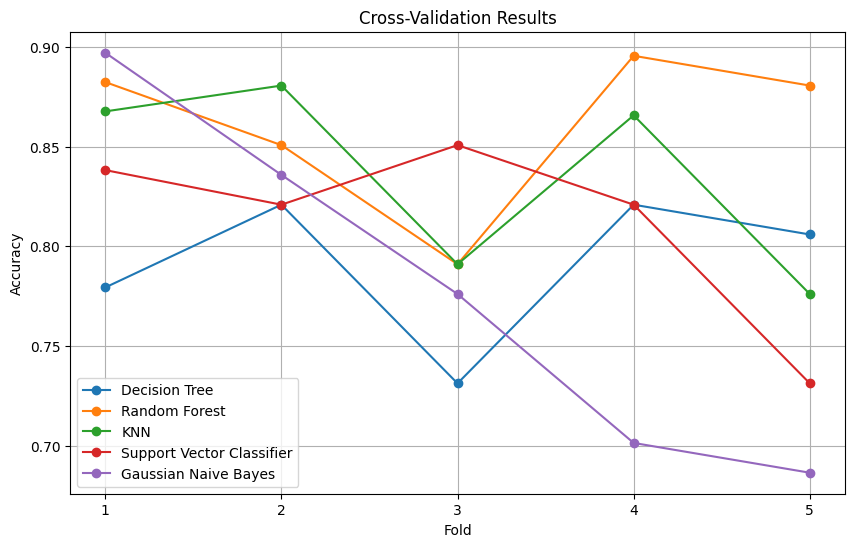

In [186]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))
for name, scores in cv_results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=name)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)
plt.show()

d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\

Decision Tree: Mean Accuracy = 0.79, Std Dev = 0.02
Random Forest: Mean Accuracy = 0.86, Std Dev = 0.04
KNN: Mean Accuracy = 0.84, Std Dev = 0.04
Support Vector Classifier: Mean Accuracy = 0.81, Std Dev = 0.04
Gaussian Naive Bayes: Mean Accuracy = 0.78, Std Dev = 0.08


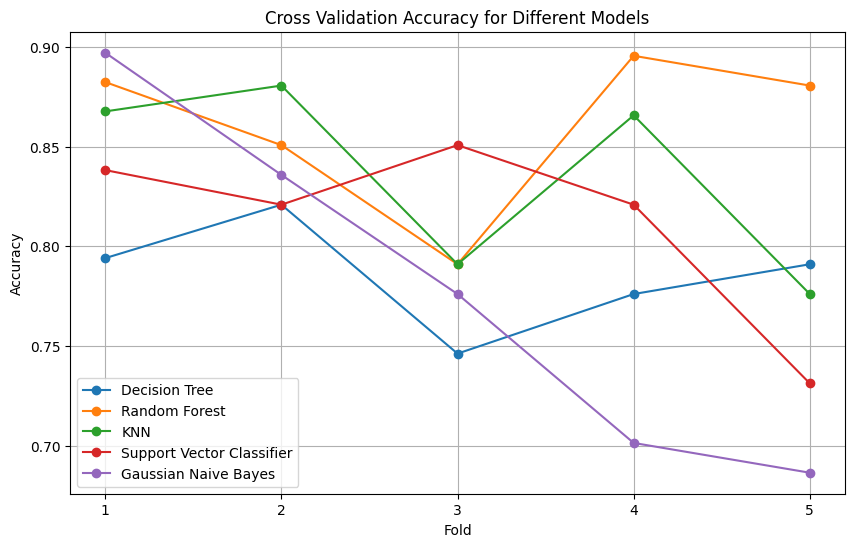

In [189]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(kernel='linear', probability=True),
    'Gaussian Naive Bayes': GaussianNB()
}

# Perform cross-validation
cv_results = {}
num_folds = 5
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=num_folds)
    cv_results[name] = cv_scores

# Plot cross-validation results
plt.figure(figsize=(10, 6))
for name, scores in cv_results.items():
    plt.plot(range(1, num_folds + 1), scores, marker='o', label=name)
# Print cross-validation results
for name, scores in cv_results.items():
    print(f"{name}: Mean Accuracy = {np.mean(scores):.2f}, Std Dev = {np.std(scores):.2f}")

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for Different Models')
plt.xticks(np.arange(1, num_folds + 1))
plt.legend()
plt.grid(True)
plt.show()